In [120]:
%run C://Users/a/apython/__init__/Normal_for_DSS.py

from IPython.core.display import display
from PIL import Image, ImageFilter
import math
import matplotlib.pyplot as plt
import numpy as np

from skimage import img_as_float
from skimage.feature import blob_dog
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate


In [91]:
ac = np.array([(1,0,0),(0,1,0),(0,0,1),(1,1,0.0),(0,1,1),(0.7,0,0.7),(0.6,0.6,0.6)])
ac1 = ac / 2.
ac1

array([[ 0.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.5 ,  0.  ],
       [ 0.  ,  0.  ,  0.5 ],
       [ 0.5 ,  0.5 ,  0.  ],
       [ 0.  ,  0.5 ,  0.5 ],
       [ 0.35,  0.  ,  0.35],
       [ 0.3 ,  0.3 ,  0.3 ]])

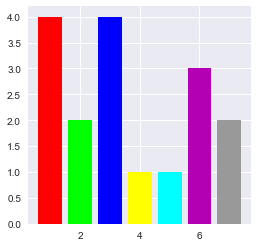

In [92]:
plt.figure(figsize = (4,4), num=1 )
plt.bar([1,2,3,4,5,6,7],[4,2,4,1,1,3,2],color=ac, )
plt.show()

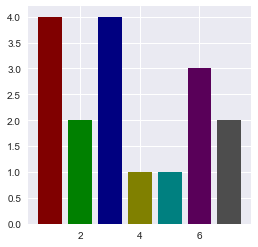

In [93]:
plt.figure(figsize = (4,4), num=1 )
plt.bar([1,2,3,4,5,6,7],[4,2,4,1,1,3,2],color=ac1, )
plt.show()

In [94]:
_inferno_data = [[0.001462, 0.000466, 0.013866],
                 [0.002267, 0.001270, 0.018570],
                 [0.003299, 0.002249, 0.024239],
                 [0.004547, 0.003392, 0.030909],
                 [0.006006, 0.004692, 0.038558],
                 [0.007676, 0.006136, 0.046836],
                 [0.009561, 0.007713, 0.055143],
                 [0.011663, 0.009417, 0.063460],
                 [0.013995, 0.011225, 0.071862],
                 [0.016561, 0.013136, 0.080282],
                 [0.019373, 0.015133, 0.088767],
                 [0.022447, 0.017199, 0.097327],
                 [0.025793, 0.019331, 0.105930],
                 [0.029432, 0.021503, 0.114621],
                 [0.033385, 0.023702, 0.123397],
                 [0.037668, 0.025921, 0.132232],
                 [0.042253, 0.028139, 0.141141],
                 [0.046915, 0.030324, 0.150164],
                 [0.051644, 0.032474, 0.159254],
                 [0.056449, 0.034569, 0.168414],
                 [0.061340, 0.036590, 0.177642],
                 [0.066331, 0.038504, 0.186962],
                 [0.071429, 0.040294, 0.196354],
                 [0.076637, 0.041905, 0.205799],
                 [0.081962, 0.043328, 0.215289],
                 [0.087411, 0.044556, 0.224813],
                 [0.092990, 0.045583, 0.234358],
                 [0.098702, 0.046402, 0.243904],
                 [0.104551, 0.047008, 0.253430],
                 [0.110536, 0.047399, 0.262912],
                 [0.116656, 0.047574, 0.272321],
                 [0.122908, 0.047536, 0.281624],
                 [0.129285, 0.047293, 0.290788],
                 [0.135778, 0.046856, 0.299776],
                 [0.142378, 0.046242, 0.308553],
                 [0.149073, 0.045468, 0.317085],
                 [0.155850, 0.044559, 0.325338],
                 [0.162689, 0.043554, 0.333277],
                 [0.169575, 0.042489, 0.340874],
                 [0.176493, 0.041402, 0.348111],
                 [0.183429, 0.040329, 0.354971],
                 [0.190367, 0.039309, 0.361447],
                 [0.197297, 0.038400, 0.367535],
                 [0.204209, 0.037632, 0.373238],
                 [0.211095, 0.037030, 0.378563],
                 [0.217949, 0.036615, 0.383522],
                 [0.224763, 0.036405, 0.388129],
                 [0.231538, 0.036405, 0.392400],
                 [0.238273, 0.036621, 0.396353],
                 [0.244967, 0.037055, 0.400007],
                 [0.251620, 0.037705, 0.403378],
                 [0.258234, 0.038571, 0.406485],
                 [0.264810, 0.039647, 0.409345],
                 [0.271347, 0.040922, 0.411976],
                 [0.277850, 0.042353, 0.414392],
                 [0.284321, 0.043933, 0.416608],
                 [0.290763, 0.045644, 0.418637],
                 [0.297178, 0.047470, 0.420491],
                 [0.303568, 0.049396, 0.422182],
                 [0.309935, 0.051407, 0.423721],
                 [0.316282, 0.053490, 0.425116],
                 [0.322610, 0.055634, 0.426377],
                 [0.328921, 0.057827, 0.427511],
                 [0.335217, 0.060060, 0.428524],
                 [0.341500, 0.062325, 0.429425],
                 [0.347771, 0.064616, 0.430217],
                 [0.354032, 0.066925, 0.430906],
                 [0.360284, 0.069247, 0.431497],
                 [0.366529, 0.071579, 0.431994],
                 [0.372768, 0.073915, 0.432400],
                 [0.379001, 0.076253, 0.432719],
                 [0.385228, 0.078591, 0.432955],
                 [0.391453, 0.080927, 0.433109],
                 [0.397674, 0.083257, 0.433183],
                 [0.403894, 0.085580, 0.433179],
                 [0.410113, 0.087896, 0.433098],
                 [0.416331, 0.090203, 0.432943],
                 [0.422549, 0.092501, 0.432714],
                 [0.428768, 0.094790, 0.432412],
                 [0.434987, 0.097069, 0.432039],
                 [0.441207, 0.099338, 0.431594],
                 [0.447428, 0.101597, 0.431080],
                 [0.453651, 0.103848, 0.430498],
                 [0.459875, 0.106089, 0.429846],
                 [0.466100, 0.108322, 0.429125],
                 [0.472328, 0.110547, 0.428334],
                 [0.478558, 0.112764, 0.427475],
                 [0.484789, 0.114974, 0.426548],
                 [0.491022, 0.117179, 0.425552],
                 [0.497257, 0.119379, 0.424488],
                 [0.503493, 0.121575, 0.423356],
                 [0.509730, 0.123769, 0.422156],
                 [0.515967, 0.125960, 0.420887],
                 [0.522206, 0.128150, 0.419549],
                 [0.528444, 0.130341, 0.418142],
                 [0.534683, 0.132534, 0.416667],
                 [0.540920, 0.134729, 0.415123],
                 [0.547157, 0.136929, 0.413511],
                 [0.553392, 0.139134, 0.411829],
                 [0.559624, 0.141346, 0.410078],
                 [0.565854, 0.143567, 0.408258],
                 [0.572081, 0.145797, 0.406369],
                 [0.578304, 0.148039, 0.404411],
                 [0.584521, 0.150294, 0.402385],
                 [0.590734, 0.152563, 0.400290],
                 [0.596940, 0.154848, 0.398125],
                 [0.603139, 0.157151, 0.395891],
                 [0.609330, 0.159474, 0.393589],
                 [0.615513, 0.161817, 0.391219],
                 [0.621685, 0.164184, 0.388781],
                 [0.627847, 0.166575, 0.386276],
                 [0.633998, 0.168992, 0.383704],
                 [0.640135, 0.171438, 0.381065],
                 [0.646260, 0.173914, 0.378359],
                 [0.652369, 0.176421, 0.375586],
                 [0.658463, 0.178962, 0.372748],
                 [0.664540, 0.181539, 0.369846],
                 [0.670599, 0.184153, 0.366879],
                 [0.676638, 0.186807, 0.363849],
                 [0.682656, 0.189501, 0.360757],
                 [0.688653, 0.192239, 0.357603],
                 [0.694627, 0.195021, 0.354388],
                 [0.700576, 0.197851, 0.351113],
                 [0.706500, 0.200728, 0.347777],
                 [0.712396, 0.203656, 0.344383],
                 [0.718264, 0.206636, 0.340931],
                 [0.724103, 0.209670, 0.337424],
                 [0.729909, 0.212759, 0.333861],
                 [0.735683, 0.215906, 0.330245],
                 [0.741423, 0.219112, 0.326576],
                 [0.747127, 0.222378, 0.322856],
                 [0.752794, 0.225706, 0.319085],
                 [0.758422, 0.229097, 0.315266],
                 [0.764010, 0.232554, 0.311399],
                 [0.769556, 0.236077, 0.307485],
                 [0.775059, 0.239667, 0.303526],
                 [0.780517, 0.243327, 0.299523],
                 [0.785929, 0.247056, 0.295477],
                 [0.791293, 0.250856, 0.291390],
                 [0.796607, 0.254728, 0.287264],
                 [0.801871, 0.258674, 0.283099],
                 [0.807082, 0.262692, 0.278898],
                 [0.812239, 0.266786, 0.274661],
                 [0.817341, 0.270954, 0.270390],
                 [0.822386, 0.275197, 0.266085],
                 [0.827372, 0.279517, 0.261750],
                 [0.832299, 0.283913, 0.257383],
                 [0.837165, 0.288385, 0.252988],
                 [0.841969, 0.292933, 0.248564],
                 [0.846709, 0.297559, 0.244113],
                 [0.851384, 0.302260, 0.239636],
                 [0.855992, 0.307038, 0.235133],
                 [0.860533, 0.311892, 0.230606],
                 [0.865006, 0.316822, 0.226055],
                 [0.869409, 0.321827, 0.221482],
                 [0.873741, 0.326906, 0.216886],
                 [0.878001, 0.332060, 0.212268],
                 [0.882188, 0.337287, 0.207628],
                 [0.886302, 0.342586, 0.202968],
                 [0.890341, 0.347957, 0.198286],
                 [0.894305, 0.353399, 0.193584],
                 [0.898192, 0.358911, 0.188860],
                 [0.902003, 0.364492, 0.184116],
                 [0.905735, 0.370140, 0.179350],
                 [0.909390, 0.375856, 0.174563],
                 [0.912966, 0.381636, 0.169755],
                 [0.916462, 0.387481, 0.164924],
                 [0.919879, 0.393389, 0.160070],
                 [0.923215, 0.399359, 0.155193],
                 [0.926470, 0.405389, 0.150292],
                 [0.929644, 0.411479, 0.145367],
                 [0.932737, 0.417627, 0.140417],
                 [0.935747, 0.423831, 0.135440],
                 [0.938675, 0.430091, 0.130438],
                 [0.941521, 0.436405, 0.125409],
                 [0.944285, 0.442772, 0.120354],
                 [0.946965, 0.449191, 0.115272],
                 [0.949562, 0.455660, 0.110164],
                 [0.952075, 0.462178, 0.105031],
                 [0.954506, 0.468744, 0.099874],
                 [0.956852, 0.475356, 0.094695],
                 [0.959114, 0.482014, 0.089499],
                 [0.961293, 0.488716, 0.084289],
                 [0.963387, 0.495462, 0.079073],
                 [0.965397, 0.502249, 0.073859],
                 [0.967322, 0.509078, 0.068659],
                 [0.969163, 0.515946, 0.063488],
                 [0.970919, 0.522853, 0.058367],
                 [0.972590, 0.529798, 0.053324],
                 [0.974176, 0.536780, 0.048392],
                 [0.975677, 0.543798, 0.043618],
                 [0.977092, 0.550850, 0.039050],
                 [0.978422, 0.557937, 0.034931],
                 [0.979666, 0.565057, 0.031409],
                 [0.980824, 0.572209, 0.028508],
                 [0.981895, 0.579392, 0.026250],
                 [0.982881, 0.586606, 0.024661],
                 [0.983779, 0.593849, 0.023770],
                 [0.984591, 0.601122, 0.023606],
                 [0.985315, 0.608422, 0.024202],
                 [0.985952, 0.615750, 0.025592],
                 [0.986502, 0.623105, 0.027814],
                 [0.986964, 0.630485, 0.030908],
                 [0.987337, 0.637890, 0.034916],
                 [0.987622, 0.645320, 0.039886],
                 [0.987819, 0.652773, 0.045581],
                 [0.987926, 0.660250, 0.051750],
                 [0.987945, 0.667748, 0.058329],
                 [0.987874, 0.675267, 0.065257],
                 [0.987714, 0.682807, 0.072489],
                 [0.987464, 0.690366, 0.079990],
                 [0.987124, 0.697944, 0.087731],
                 [0.986694, 0.705540, 0.095694],
                 [0.986175, 0.713153, 0.103863],
                 [0.985566, 0.720782, 0.112229],
                 [0.984865, 0.728427, 0.120785],
                 [0.984075, 0.736087, 0.129527],
                 [0.983196, 0.743758, 0.138453],
                 [0.982228, 0.751442, 0.147565],
                 [0.981173, 0.759135, 0.156863],
                 [0.980032, 0.766837, 0.166353],
                 [0.978806, 0.774545, 0.176037],
                 [0.977497, 0.782258, 0.185923],
                 [0.976108, 0.789974, 0.196018],
                 [0.974638, 0.797692, 0.206332],
                 [0.973088, 0.805409, 0.216877],
                 [0.971468, 0.813122, 0.227658],
                 [0.969783, 0.820825, 0.238686],
                 [0.968041, 0.828515, 0.249972],
                 [0.966243, 0.836191, 0.261534],
                 [0.964394, 0.843848, 0.273391],
                 [0.962517, 0.851476, 0.285546],
                 [0.960626, 0.859069, 0.298010],
                 [0.958720, 0.866624, 0.310820],
                 [0.956834, 0.874129, 0.323974],
                 [0.954997, 0.881569, 0.337475],
                 [0.953215, 0.888942, 0.351369],
                 [0.951546, 0.896226, 0.365627],
                 [0.950018, 0.903409, 0.380271],
                 [0.948683, 0.910473, 0.395289],
                 [0.947594, 0.917399, 0.410665],
                 [0.946809, 0.924168, 0.426373],
                 [0.946392, 0.930761, 0.442367],
                 [0.946403, 0.937159, 0.458592],
                 [0.946903, 0.943348, 0.474970],
                 [0.947937, 0.949318, 0.491426],
                 [0.949545, 0.955063, 0.507860],
                 [0.951740, 0.960587, 0.524203],
                 [0.954529, 0.965896, 0.540361],
                 [0.957896, 0.971003, 0.556275],
                 [0.961812, 0.975924, 0.571925],
                 [0.966249, 0.980678, 0.587206],
                 [0.971162, 0.985282, 0.602154],
                 [0.976511, 0.989753, 0.616760],
                 [0.982257, 0.994109, 0.631017],
                 [0.988362, 0.998364, 0.644924]]


In [96]:
a = _inferno_data

In [101]:
p = np.arange(256)

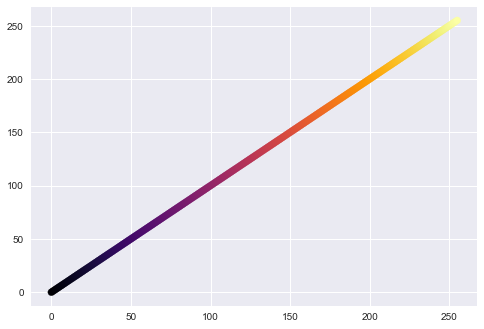

In [118]:
plt.scatter(p,p,c=a)
plt.show()

In [152]:
a = Image.open('C:/Users/a/flower1.jpg')
b = Image.open('C:/Users/a/flower2.jpg')

In [154]:
b_f = np.array(b)/255.
b_f.shape

(26, 12, 3)

In [153]:
a_f =  np.array(a)/255.
a_f.shape

(96, 16, 3)

In [141]:
yt = np.arange(20)*48
xt = np.arange(20)*27

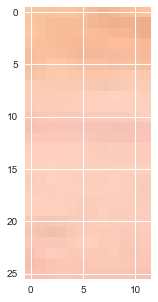

In [162]:
plt.figure(figsize=(5,5))
plt.imshow(b_f)
plt.show()

In [176]:
flow_2 = np.array(b_f[:,5])
flow_2

array([[ 0.98039216,  0.75294118,  0.60784314],
       [ 0.96470588,  0.7372549 ,  0.59215686],
       [ 0.97647059,  0.74117647,  0.6       ],
       [ 0.97254902,  0.7254902 ,  0.59607843],
       [ 0.95294118,  0.71372549,  0.59215686],
       [ 0.96862745,  0.74509804,  0.63137255],
       [ 0.98039216,  0.78039216,  0.6745098 ],
       [ 0.97647059,  0.78823529,  0.69803922],
       [ 0.99607843,  0.81176471,  0.73333333],
       [ 0.99607843,  0.81176471,  0.74901961],
       [ 0.98039216,  0.78823529,  0.73333333],
       [ 0.97254902,  0.76862745,  0.71764706],
       [ 0.98823529,  0.78431373,  0.73333333],
       [ 0.99607843,  0.81176471,  0.74901961],
       [ 0.99607843,  0.81568627,  0.75294118],
       [ 0.98039216,  0.81960784,  0.74117647],
       [ 0.98039216,  0.81176471,  0.74509804],
       [ 0.98431373,  0.81568627,  0.74901961],
       [ 0.98039216,  0.8       ,  0.7372549 ],
       [ 0.97647059,  0.8       ,  0.7254902 ],
       [ 0.98039216,  0.79607843,  0.725

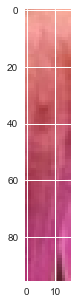

In [161]:
plt.figure(figsize=(5,5))
plt.imshow(a_f)
plt.show()

In [163]:
flow_1 = a_f[:,9]

In [180]:
flow_1
print(flow_1.shape,flow_2.shape)

(96, 3) (26, 3)


In [177]:
pl = np.arange(len(flow_1))
ppl = np.arange(len(flow_2))

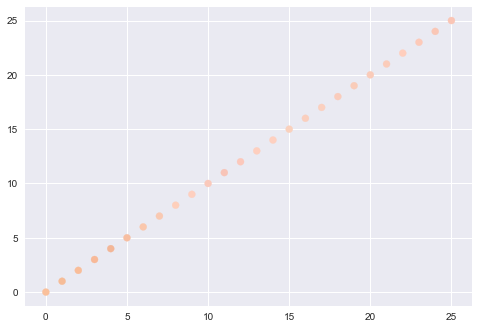

In [178]:
plt.scatter(ppl,ppl,color = flow_2)
plt.show()

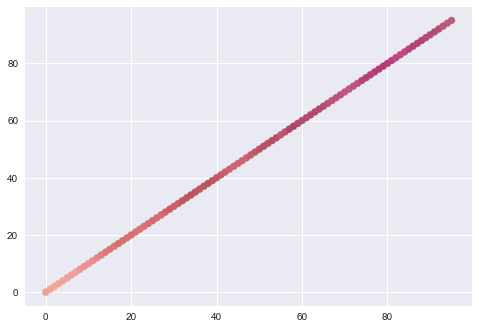

In [174]:
plt.scatter(pl,pl,color = flow_1)
plt.show()

In [181]:
kk = np.arange(100)

In [182]:
def double(kk):
    
    

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])